#### Impedindo notebook de escrever bytecode

In [1]:
import sys
sys.dont_write_bytecode = True

#### Inserindo caminho dos módulos em sys.path

In [2]:
import pathlib
import os
sys.path.append(str(pathlib.Path(os.getcwd()).parent.parent.resolve()))

#### Importando módulos

In [3]:
from modules.point import PointDataset
from modules.classifier import ConvexHullClassifier, KNNClassifier, ClassifiersComparison
from random import choices
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Lendo dataset

In [4]:
dataset = PointDataset("./data.dat")
points = dataset.getPoints()

#### Criando construtor de instância do classificador baseado em envoltória convexa para as features (0, 1)

In [5]:
CHclf = ConvexHullClassifier.buildInstance(coordinate1=0, coordinate2=1, nFolds=5)

#### Criando construtor de instância do classificador KNN com otimização iterativa do número de vizinhos

A otimização é feita da seguinte forma: validação cruzada com 5 folds é executada para classificador, variando o número de vizinhos de 1 a _maxK_. É escolhido o número de vizinhos que apresenta a melhor _F1 Score_ média entre os folds. Se _makK_ não for passado, _maxK_ é igual à raíz quadrada do tamanho do dataset.

In [6]:
KNNclf = KNNClassifier.buildInstance(maxK=30, nFolds=5)

#### Comparação da diferença média para as métricas _Precisão_, _Sensibilidade_, _F1 Score_ e _Acurácia_ entre os classificadores par a par

Para efeutar a comparação, um bootstrapping foi feito usando 100 amostras com reposição e 100 indivíduos em cada uma delas.

In [7]:
clfComparison = ClassifiersComparison(points, [KNNclf, CHclf], sampleSize=100, nSamples=100)
meanDiff = clfComparison.run()
meanDiff

/home/turi/aulas/5sem/ALG2/TP1/modules/classifier/classifier.py:61: RuntimeWarning: invalid value encountered in long_scalars
  precision: float = confusionMatrix[0][0] / \
/home/turi/aulas/5sem/ALG2/TP1/modules/classifier/classifier.py:82: RuntimeWarning: invalid value encountered in double_scalars
  f1 = (2*precision*recall)/(precision + recall)
/home/turi/aulas/5sem/ALG2/TP1/modules/classifier/classifier.py:70: RuntimeWarning: invalid value encountered in long_scalars
  recall: float = confusionMatrix[0][0] / \
/home/turi/aulas/5sem/ALG2/TP1/modules/classifier/classifier.py:82: RuntimeWarning: invalid value encountered in double_scalars
  f1 = (2*precision*recall)/(precision + recall)
/home/turi/aulas/5sem/ALG2/TP1/modules/classifier/classifier.py:61: RuntimeWarning: invalid value encountered in long_scalars
  precision: float = confusionMatrix[0][0] / \
/home/turi/aulas/5sem/ALG2/TP1/modules/classifier/classifier.py:70: RuntimeWarning: invalid value encountered in long_scalars
  re

,Precision,Recall,F1,Accuracy,Label
0,-0.090909,0.514286,-0.090909,0.100000,KNNClassifier/ConvexHullClassifier
1,0.833333,0.714286,NaN,0.366667,KNNClassifier/ConvexHullClassifier
2,NaN,0.733333,NaN,0.366667,KNNClassifier/ConvexHullClassifier
3,0.482353,0.615686,0.482353,0.433333,KNNClassifier/ConvexHullClassifier
4,0.631579,0.104396,0.631579,0.433333,KNNClassifier/ConvexHullClassifier
...,...,...,...,...,...
195,-0.600000,-0.318182,-0.600000,-0.233333,ConvexHullClassifier/KNNClassifier
196,-0.300000,-0.478022,-0.300000,-0.266667,ConvexHullClassifier/KNNClassifier
197,-0.357143,-0.554656,-0.357143,-0.133333,ConvexHullClassifier/KNNClassifier
198,-0.140271,-0.046154,-0.140271,-0.133333,ConvexHullClassifier/KNNClassifier


#### Plot dos histogramas de diferença média para as métricas entre os classificadores KNN e Convex Hull para as features (0, 1)

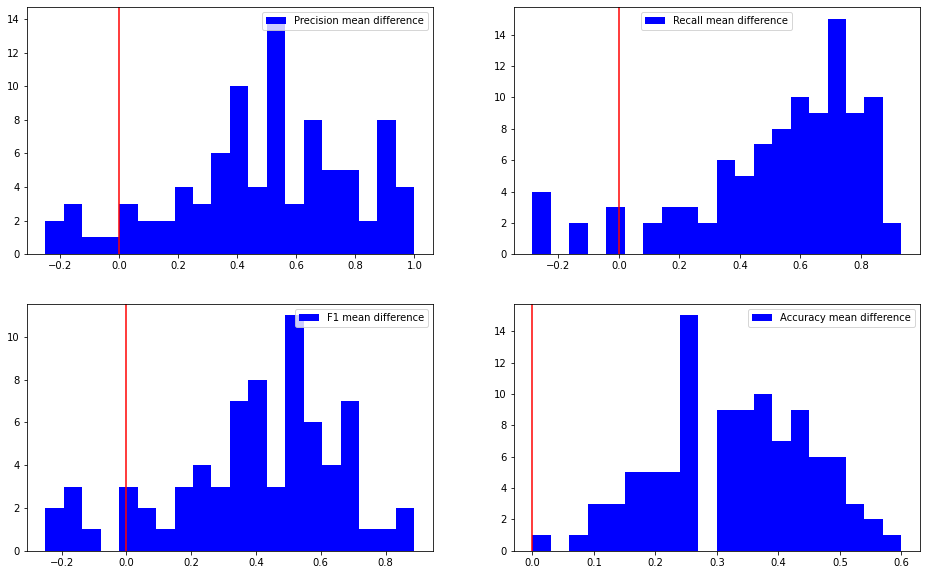

In [9]:
clfComparison.plotPairComparison('KNNClassifier/ConvexHullClassifier')